<font color='red'>

# Titanic EDA Project
    
<font color='black'>

Content of The Titanic Exploratory Data Analysis
1. [Chapter-1 Data Load and Check](#1)
    * [1-Outlier Detection](#2)
    * [2-Joining Test and Train Data](#3)
    * [3-Feature Check](#4)
1. [Chapter-2 Data Analysis](#5)
    * [1-Feature Analysis](#6)
    * [2-Corelation Between Feature](#7)
1. [Chapter-3 Missing Value](#8)
    * [1-Find Missing Value](#9)
    * [2-Fill Missing Value](#10)
1. [Chapter-4 Data Engineering](#11)
    * [1-New Feature](#12)
    * [2-Drop Feature](#13)
    * [3-One Hot Encoding](#14)
    * [4-Feature Normalization ](#15)
1. [Chapter-5 Modeling](#16)
    * [1-Train-Test Split](#17)
    * [2-Classification Methods](#18)
    * [3-Ensemble Modeling](#19)
    * [4-Result](#20)


   
    
    
    
    



    
    
    

<a id='1'></a><br>
# Chapter:1 Data Load And Check

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.drop("Cabin", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 <a id='2'></a><br>
## 1-Outlier Detection


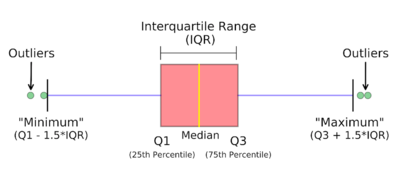

* Q1 = 1.Quartile 25%
* Q2 = 2.Quartile 50% (median)
* Q3 = 3.Quartile 75%
* IQR = Q3 - Q1
* Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)



In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        outlier_list = data[(data[each] < Q1 - 1.5*IQR) | (data[each] > Q3 + 1.5*IQR)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    outlier_data = list(i for i, v in outlier_index.items() if v > 2)
    return outlier_data

In [9]:
outlier_data = outlier_detect(["Age","SibSp","Parch","Fare"], train_data)
train_data.loc[outlier_data]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [10]:
train_data = train_data.drop(outlier_data, axis=0).reset_index(drop=True)

<a id='3'></a><br>
## 2-Combining Train and Test Data


* Train_data and test_data are combined so that data is obtained. 


In [11]:
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Ticket       1299 non-null   object 
 9   Fare         1298 non-null   float64
 10  Cabin        292 non-null    object 
 11  Embarked     1297 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 121.9+ KB


<a id='4'></a><br>
## 3-Feature Analysis

1. PassengerId : unique id number to each passenger
1. Survived : passenger survive(1) and died(0)
1. Pclass : passenger class
1. Name : name of passenger
1. Sex : gender of passenger
1. Age : age of passenger
1. SibSp : number of siblings/spouse
1. Parch : number of parent/children
1. Ticket : ticket number
1. Fare : amount of money spent on ticket
1. Cabin : cabin category
1. Embarked : port where passenger embarked (C= Cherbourg, Q=Quenntown, S = Southampton)




* int64(5)   : PassengerId, Survived, Pclass, SibSp and Parch
* object(5)  : Name, Sex, Ticket, Cabin and Embarked
* float64(2) : Age and Fare

### Survived

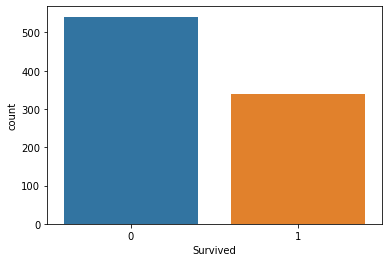

In [13]:
sns.countplot('Survived',data=train_data )


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1299.000000,881.000000,1299.000000,1043.000000,1299.000000,1299.000000,1298.000000
mean,657.093149,0.385925,2.294072,29.903806,0.452656,0.372594,32.569058
std,377.743244,0.487090,0.837150,14.427548,0.879416,0.857157,50.694652
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,331.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,657.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,984.500000,1.000000,3.000000,39.000000,1.000000,0.000000,30.646850
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<a id='5'></a><br>
# Chapter:2 Data Analysis

* Feature Analysis
* Corelation Between Features



<a id='6'></a><br>
## 1- Feature Analysis

* Sex - Survived
* Pclass - Survived
* Embarked - Survived
* SibSp - Survived
* Parch - Survived
* Age - Survived
* Fare - Survived

### Sex - Survived

Female are more likely to survive than male.

In [15]:
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.747573
1,male,0.190559


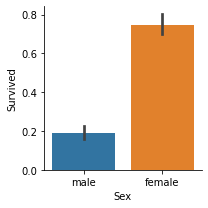

In [16]:
g = sns.factorplot(x="Sex", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Pclass - Survived

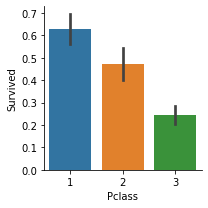

In [17]:
sns.factorplot(x="Pclass", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Embarked - Survived

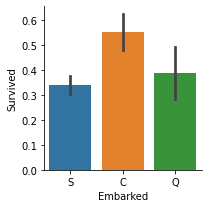

In [18]:
sns.factorplot(x="Embarked", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### SibSp - Survived

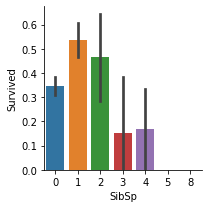

In [19]:
sns.factorplot(x="SibSp", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Parch - Survived

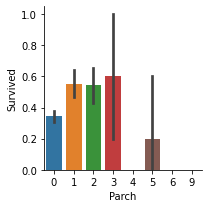

In [20]:
g = sns.factorplot(x="Parch", y ="Survived", data=data, kind="bar", size=3)
plt.show()

 ### Age - Survived

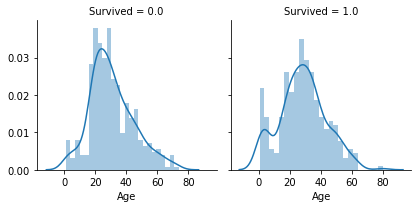

In [21]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

 ### Fare - Survived

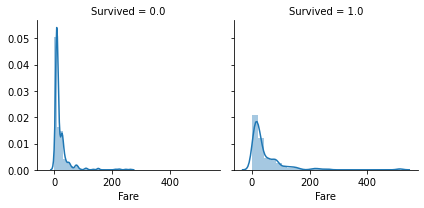

In [22]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "Fare", bins=25)
plt.show()

<a id='7'></a><br>
## 2-Colelation Between Features

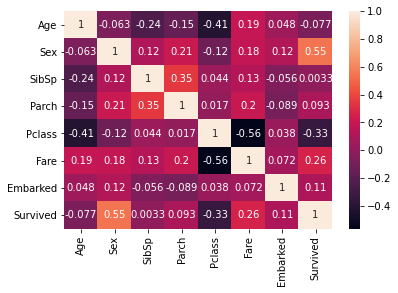

In [23]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

**Outcome**    

* Sex, Pclass, Fare and Embarked are associated with Survived. 


<a id='8'></a><br>
# Chapter-3 Missing Value

* Find Missing Value
* Fill Missing Value


<a id='9'></a><br>
## 1-Find Missing Value

In [24]:
data.columns[data.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [25]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id='10'></a><br>
## 2-Fill Missing Value

* Cabin has 1007 missing value
* Age has 256 missing value
* Embarked has 2 missing value
* Fare has 1 missing value

Not: Survived has 418 missing value (only test value)

### Fare Fill Value

In [26]:
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0.0


In [27]:
data["Fare"] = data["Fare"].fillna(np.mean(data[((data["Pclass"]==3) & (data["Embarked"]==0))]["Fare"]))
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Embarked Fill Value
S = 0,  C = 1 and Q = 2

In [28]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [29]:
data["Embarked"] = data["Embarked"].fillna(1)
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Age Fill Value


* Age feature will be done later

In [30]:
data[data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1.0
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,2.0
1291,1302,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,2.0
1294,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1297,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


<a id='8'></a><br>
# Chapter-4 Data Engineering

* New Feature
* Edit Feature
* Drop Feature
* Normalization

<a id='12'></a><br>
## 1-New - Feature
* Alone and Family Size
* Name - Title
* Age Missing Value
* Age Limit

### Alone and Family Size
* SibSp + Parch = family size

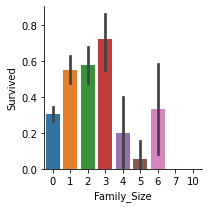

In [31]:
data["Family_Size"] = data["SibSp"] + data["Parch"]
g = sns.factorplot(x="Family_Size", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [32]:
data["Alone"] = [1 if i == 0 else 0 for i in data["Family_Size"]]
data["Family_Size"].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


### Name - Title

In [33]:
data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

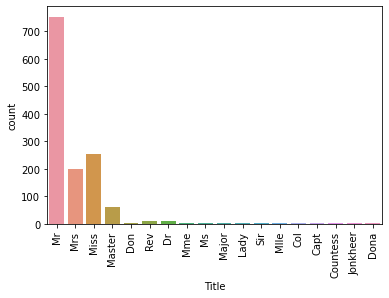

In [34]:
sns.countplot(data["Title"])
plt.xticks(rotation = 90)
plt.show()

In [35]:
data['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

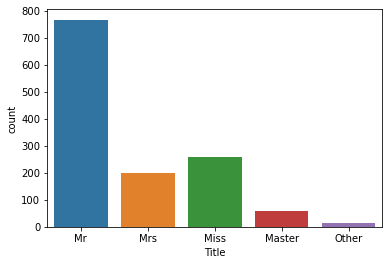

In [36]:
sns.countplot(data["Title"])
plt.show()

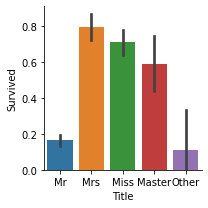

In [37]:
sns.factorplot(x="Title", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [38]:
data["Title"].replace(["Mr","Mrs","Miss","Master","Other"], [1,2,3,4,5], inplace=True)


In [39]:
data['Fare_Limit']=0
data.loc[data['Fare']<=7.91,'Fare_Limit']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_Limit']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_Limit']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_Limit']=3

### Age Missing Value

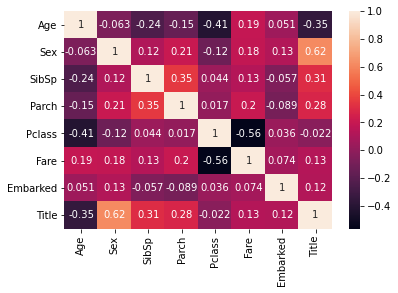

In [40]:
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Title"]].corr(), annot = True)


In [41]:
data_age_nan_index = data[data["Age"].isnull()].index
for i in data_age_nan_index:
    mean_age = data["Age"][(data["Pclass"]==data.iloc[i]["Pclass"]) & ((data["Title"]==data.iloc[i]["Title"]))].mean()
    data["Age"].iloc[i] = mean_age

In [42]:
data["Title"].replace([1,2,3,4,5], [1,2,2,3,1], inplace=True)


### Age Limit

In [43]:
data['Age_Limit']=0
data.loc[data['Age']<=16,'Age_Limit']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_Limit']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_Limit']=2
data.loc[(data['Age']>48)&(data['Age']<=60),'Age_Limit']=3
data.loc[data['Age']>60,'Age_Limit']=4

### Corelation Matrix

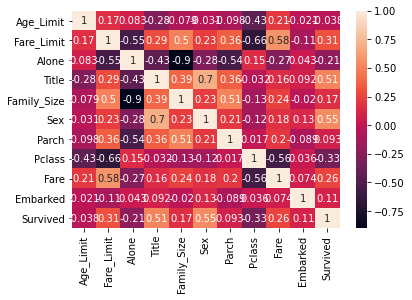

In [44]:
sns.heatmap(data[["Age_Limit", "Fare_Limit","Alone", "Title","Family_Size","Sex","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

<a id='13'></a><br>
## 2- Drop Features
* Ticket, Cabin, Name, PassengerId, Sibsp, Parch and Age are deleted according to the result of the corelation matrix.

In [45]:
data.drop(labels=["Fare", "Ticket","Cabin", "Name", "PassengerId", "Age"], axis=1, inplace = True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family_Size,Alone,Title,Fare_Limit,Age_Limit
0,0.0,3,0,1,0,0.0,1,0,1,0,1
1,1.0,1,1,1,0,1.0,1,0,2,3,2
2,1.0,3,1,0,0,0.0,0,1,2,1,1
3,1.0,1,1,1,0,0.0,1,0,2,3,2
4,0.0,3,0,0,0,0.0,0,1,1,1,2


<a id='14'></a><br>
## 3 - One Hot Encoding

In [46]:
data = pd.get_dummies(data,columns=["Pclass"])
data = pd.get_dummies(data,columns=["Sex"])
data = pd.get_dummies(data,columns=["Embarked"])
data = pd.get_dummies(data,columns=["Family_Size"])
data = pd.get_dummies(data,columns=["Alone"])
data = pd.get_dummies(data,columns=["Age_Limit"])
data = pd.get_dummies(data,columns=["Fare_Limit"])


data.head()

,Survived,SibSp,Parch,Title,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,...,Alone_1,Age_Limit_0,Age_Limit_1,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3
0,0.0,1,0,1,0,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1.0,1,0,2,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,0,0,2,0,0,1,0,1,1,...,1,0,1,0,0,0,0,1,0,0
3,1.0,1,0,2,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0.0,0,0,1,0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0


<a id='15'></a><br>
## 4-Normalization

* Min-max normalization is one of the most common ways to normalize data.
* Fare was normalized by the min-max normalized method

In [47]:
#data["Fare"] = (data["Fare"] - np.min(data["Fare"]))/(np.max(data["Fare"]-np.min(data["Fare"])))#

<a id='16'></a><br>
# Chapter:5 Modeling

In [48]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<a id='17'></a><br>
## 1-Train Test Split

In [49]:
if len(data) == (len(train_data) + len(test_data)):
    print("success")

success


In [50]:
test = data[len(train_data):]
test.drop(labels="Survived", axis=1, inplace=True)
test

,SibSp,Parch,Title,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,...,Alone_1,Age_Limit_0,Age_Limit_1,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3
881,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
882,1,0,2,0,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
883,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
884,0,0,1,0,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
885,1,1,2,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,0,0,1,0,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
1295,0,0,2,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
1296,0,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1297,0,0,1,0,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0


In [51]:
train = data[:len(train_data)]
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)


<a id='18'></a><br>
## 2-Classificaiton Methods


* Logistic Regression
* Random Forest Regression
* Support Vector Machine (SVM)
* K-Nearest Neighbors (KNN)

### Logistic Regression

In [52]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Train Accuracy: ", log_reg.score(X_train, y_train))
print("Test Accuracy: ", log_reg.score(X_test,y_test))

Train Accuracy:  0.8271186440677966
Test Accuracy:  0.8247422680412371


### Random Forest Regression

In [53]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Train Accuracy: ", rf_reg.score(X_train, y_train))
print("Test Accuracy: ", rf_reg.score(X_test,y_test))

Train Accuracy:  0.9050847457627119
Test Accuracy:  0.7835051546391752


### Support Vector Machine (SVM)

In [54]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Train Accuracy: ", svm_clsf.score(X_train, y_train))
print("Test Accuracy: ", svm_clsf.score(X_test,y_test))

Train Accuracy:  0.8389830508474576
Test Accuracy:  0.8316151202749141


### KNN

In [55]:
best_knn = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    best_knn.insert(n, knn.score(X_test,y_test))
best_knn


[0.7800687285223368,
 0.7663230240549829,
 0.8213058419243986,
 0.8213058419243986,
 0.8247422680412371,
 0.8075601374570447,
 0.7938144329896907,
 0.8006872852233677,
 0.7903780068728522,
 0.7938144329896907,
 0.8041237113402062]

In [56]:
knn_clsf = KNeighborsClassifier(n_neighbors=10)
knn_clsf.fit(X_train, y_train)
print("Train Accuracy: ", knn_clsf.score(X_train, y_train))
print("Test Accuracy: ", knn_clsf.score(X_test,y_test))

Train Accuracy:  0.8457627118644068
Test Accuracy:  0.7938144329896907


<a id='19'></a><br>
## 3- Ensemble Modeling

In [57]:
voting_classfication = VotingClassifier(estimators = [('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf), ('knn', knn_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Train Accuracy: ", voting_classfication.score(X_train, y_train))
print("Test Accuracy: ", voting_classfication.score(X_test,y_test))

Train Accuracy:  0.8559322033898306
Test Accuracy:  0.8213058419243986


<a id='20'></a><br>
## 4-Result



In [58]:
test_result = pd.Series(voting_classfication.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results.to_csv("hba_titanic_eda.csv", index = False)